In [4]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt
import nglview as nv

import sys
# sys.path.append('/Users/crazycatman/biomolecularmodelling/assignments/dna/pymdna/')
sys.path.append('/Users/thor/surfdrive/Projects/pymdna/')
import pymdna as mdna 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In this notebook we will analyze two mystery DNA sequences. We will determine their sequence and then compute their groove widths.

In [5]:
# Load the DNA sequence trajectories
traj_X = md.load('./data/DNA_X.xtc', top='./data/DNA_X.pdb')
traj_X = traj_X.superpose(traj_X)
traj_Y = md.load('./data/DNA_Y.xtc', top='./data/DNA_Y.pdb')
traj_Y = traj_Y.superpose(traj_Y)
traj_X, traj_Y

(<mdtraj.Trajectory with 401 frames, 762 atoms, 24 residues, and unitcells at 0x18177da90>,
 <mdtraj.Trajectory with 401 frames, 754 atoms, 24 residues, and unitcells at 0x17f061010>)

Use the topology to determine the sequence of the mystery DNA's. The function called `get_sequence` provides a starting point but you have to use the hints to complete the code. Determine also the number of base pairs, hint use `len()`.

In [6]:
def get_sequence(traj):
    top = traj.topology
    sequence = ''

    # select the leading chain of the topology
    chainid = None # replace none with the chain id of the leading chain
    # anwser:
    chainid = top.chain(0).index
    for residue in top.chain(chainid).residues:
        # use the residue name to get the base letter
        # sequence += None # replace none with the base letter using the residue instance of the topology
        # anwser: 
        sequence += residue.name[1]
    return sequence


# get the sequence of the leading chain of the topology
sequence_X = get_sequence(traj_X)
sequence_Y = get_sequence(traj_Y)


In [7]:
# compute the groove widths
grooves_X = mdna.GrooveAnalysis(traj_X)
grooves_Y = mdna.GrooveAnalysis(traj_Y)

Now we want to analyze the groove widths of the two DNA's, for this we can use a build in function called `plot_groove_widths()`, which can be called based on the `grooves_*` object returned by `GrooveAnalysis`. 

``` python
plot_groove_widths(
    minor=True,
    major=True,
    std=True,
    color='k',
    c_minor=None,
    lw=0.5,
    c_major=None,
    ax=None,
    base_labels=True,
    ls='-',
)
```

The figure has already been intialized, it is up to you to finish the plot showing for both DNA's the major and minor groove width. You can fill the subplot by indexing the `ax` and provide it to the `plot_groove_widths` method. The mean groove width together with the standard deviation over the MD simulation will be plotted in the respective subplot. What difference do you notice? Feel free to assign appropiate colors and linewidths to the subplots as well as axis labels and titles. Finally, do you expect a protein that contains a postive charged amino acid, for example an Arginine, to have a preference for DNA_X or DNA_Y, explain your reasoning.

/Users/thor/surfdrive/Projects/pymdna/pymdna/analysis.py:170: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(groove, axis=0)
/Users/thor/opt/anaconda3/envs/mdna/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/thor/surfdrive/Projects/pymdna/pymdna/analysis.py:170: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(groove, axis=0)
/Users/thor/opt/anaconda3/envs/mdna/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/thor/surfdrive/Projects/pymdna/pymdna/analysis.py:170: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(groove, axis=0)
/Users/thor/opt/anaconda3/envs/mdna/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, d

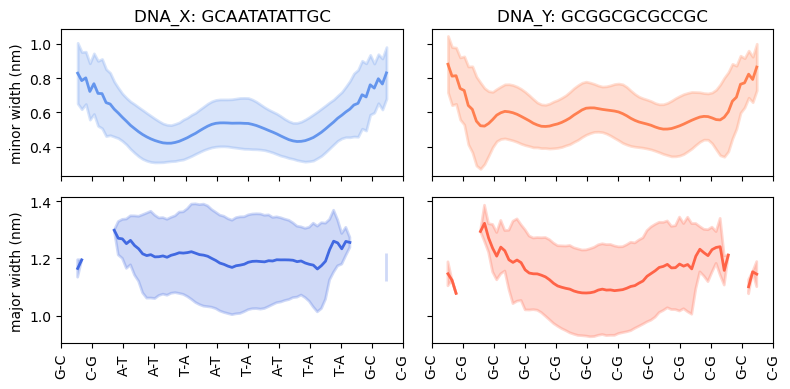

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(8, 4),sharex='col', sharey='row')
ax = ax.flatten()

# for ax[0] and ax[1] plot the minor groove width
# anwser:
grooves_X.plot_groove_widths(ax=ax[0],minor=True, major=False,color='cornflowerblue',lw=2)
grooves_Y.plot_groove_widths(ax=ax[1],minor=True, major=False,color='coral',lw=2)

# for ax[2] and ax[3] plot the major groove width
# anwser:
grooves_X.plot_groove_widths(ax=ax[2],minor=False, major=True,color='royalblue',lw=2)
grooves_Y.plot_groove_widths(ax=ax[3],minor=False, major=True,color='tomato',lw=2)

# set the labels and titles
# Answser:
ax[0].set_ylabel('minor width (nm)') 
ax[2].set_ylabel('major width (nm)')
ax[0].set_title(f'DNA_X: {sequence_X}')
ax[1].set_title(f'DNA_Y: {sequence_Y}')
fig.tight_layout()